# Step Forward Cross Validation for Bioactivity Prediction

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joypy import joyplot
from scipy.stats import skew, kurtosis

In [2]:
properties = ["LogD", "LogP", "MCE18"]
summary_list = []

# Loop through CSV files (each file corresponds to a target)
for fname in os.listdir('../benchmark/data/processed'):
    if fname.endswith(".csv"):
        # Extract target name from filename (removing ".csv")
        target_name = os.path.splitext(fname)[0]

        # Read CSV
        df = pd.read_csv(f'../benchmark/data/processed/{fname}')

        # Ensure necessary columns exist
        stats = {"Target": target_name, "N": len(df)}
        for prop in properties:
            stats[f"{prop}_Mean"] = df[prop].mean()
            stats[f"{prop}_SD"] = df[prop].std()
            stats[f"{prop}_Median"] = df[prop].median()
            stats[f"{prop}_Min"] = df[prop].min()
            stats[f"{prop}_Max"] = df[prop].max()
            stats[f"{prop}_IQR"] = df[prop].quantile(0.75) - df[prop].quantile(0.25)
            stats[f"{prop}_Skewness"] = skew(df[prop], nan_policy='omit')
            stats[f"{prop}_Kurtosis"] = kurtosis(df[prop], nan_policy='omit')

            # Append to the summary list
            summary_list.append(stats)

In [3]:
# Create summary DataFrame
summary_df = pd.DataFrame(summary_list)
summary_df

,Target,N,LogD_Mean,LogD_SD,LogD_Median,LogD_Min,LogD_Max,LogD_IQR,LogD_Skewness,LogD_Kurtosis,...,LogP_Skewness,LogP_Kurtosis,MCE18_Mean,MCE18_SD,MCE18_Median,MCE18_Min,MCE18_Max,MCE18_IQR,MCE18_Skewness,MCE18_Kurtosis
0,target_CHEMBL1865-2.Ki,339,1.766046,1.198342,1.738142,-2.055567,4.943604,1.594452,-0.115754,0.178633,...,-0.207116,0.198293,66.413066,36.256241,58.285714,5.000000,253.879493,43.000000,1.063048,2.630374
1,target_CHEMBL1865-2.Ki,339,1.766046,1.198342,1.738142,-2.055567,4.943604,1.594452,-0.115754,0.178633,...,-0.207116,0.198293,66.413066,36.256241,58.285714,5.000000,253.879493,43.000000,1.063048,2.630374
2,target_CHEMBL1865-2.Ki,339,1.766046,1.198342,1.738142,-2.055567,4.943604,1.594452,-0.115754,0.178633,...,-0.207116,0.198293,66.413066,36.256241,58.285714,5.000000,253.879493,43.000000,1.063048,2.630374
3,target_CHEMBL2148-2.Ki,202,2.102900,1.366646,2.172845,-0.721748,5.921270,1.572667,-0.044924,-0.187577,...,0.121738,-0.232296,108.143900,43.554008,104.217742,48.000000,267.980369,63.141321,0.635739,0.394366
4,target_CHEMBL2148-2.Ki,202,2.102900,1.366646,2.172845,-0.721748,5.921270,1.572667,-0.044924,-0.187577,...,0.121738,-0.232296,108.143900,43.554008,104.217742,48.000000,267.980369,63.141321,0.635739,0.394366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,target_CHEMBL253-2.Ki,502,4.279586,1.249640,4.438702,1.043995,6.851619,1.778624,-0.346118,-0.594829,...,-0.315974,-0.520195,121.048078,75.398913,94.460023,9.000000,378.701299,113.038636,1.060367,0.341403
356,target_CHEMBL253-2.Ki,502,4.279586,1.249640,4.438702,1.043995,6.851619,1.778624,-0.346118,-0.594829,...,-0.315974,-0.520195,121.048078,75.398913,94.460023,9.000000,378.701299,113.038636,1.060367,0.341403
357,target_CHEMBL264-1.Ki,587,1.885743,1.247969,2.015140,-1.663567,5.577735,1.814325,-0.058147,-0.069747,...,0.009382,-0.128662,97.790743,39.893783,103.554252,20.425263,218.770615,61.440518,0.172537,-0.551706
358,target_CHEMBL264-1.Ki,587,1.885743,1.247969,2.015140,-1.663567,5.577735,1.814325,-0.058147,-0.069747,...,0.009382,-0.128662,97.790743,39.893783,103.554252,20.425263,218.770615,61.440518,0.172537,-0.551706


In [4]:
summary_df.to_csv("../benchmark/results/tables/target_property_summary.csv", index=False)

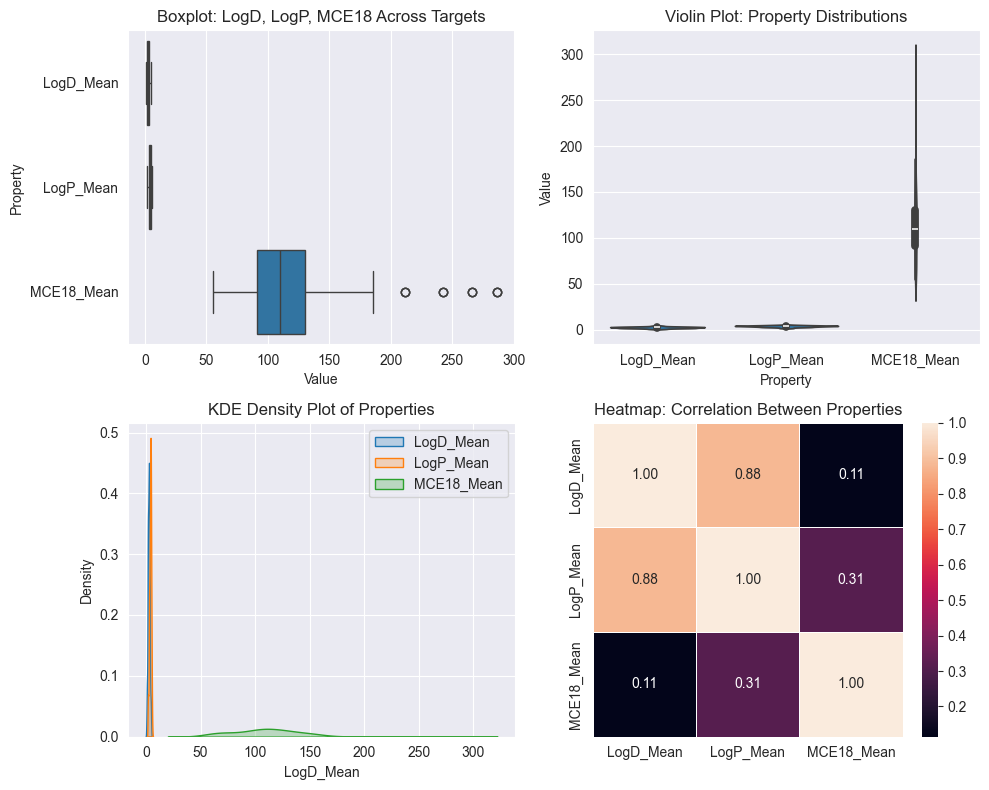

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# --- 1. Boxplots for each property per target ---
sns.boxplot(data=summary_df.melt(id_vars=["Target"], value_vars=["LogD_Mean", "LogP_Mean", "MCE18_Mean"]),
            x="value", y="variable", ax=axes[0, 0])
axes[0, 0].set_title("Boxplot: LogD, LogP, MCE18 Across Targets")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Property")

# --- 2. Violin plots per target for LogD, LogP, and MCE18 ---
sns.violinplot(data=summary_df.melt(id_vars=["Target"], value_vars=["LogD_Mean", "LogP_Mean", "MCE18_Mean"]),
               x="variable", y="value", ax=axes[0, 1])
axes[0, 1].set_title("Violin Plot: Property Distributions")
axes[0, 1].set_xlabel("Property")
axes[0, 1].set_ylabel("Value")

# --- 3. KDE Plot for Density Visualization ---
for prop in ["LogD_Mean", "LogP_Mean", "MCE18_Mean"]:
    sns.kdeplot(summary_df[prop], fill=True, label=prop, ax=axes[1, 0])
axes[1, 0].set_title("KDE Density Plot of Properties")
axes[1, 0].legend()

# --- 4. Heatmap for Correlation Between LogD, LogP, and MCE18 ---
corr_matrix = summary_df[["LogD_Mean", "LogP_Mean", "MCE18_Mean"]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Heatmap: Correlation Between Properties")

plt.tight_layout()
plt.savefig("../benchmark/results/figures/target_mean_properties_distribution_corr.pdf")
plt.show()

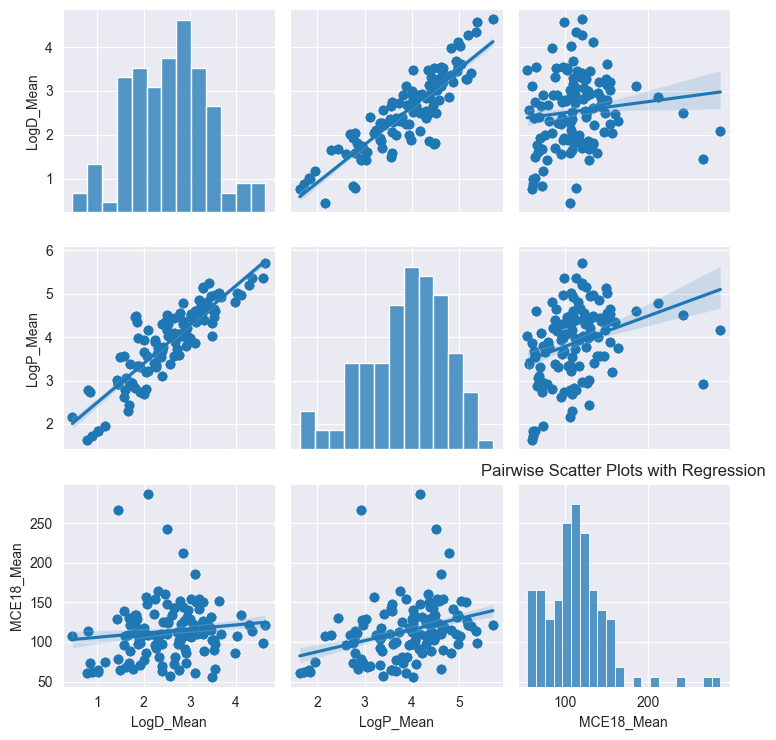

In [6]:
sns.pairplot(summary_df[["LogD_Mean", "LogP_Mean", "MCE18_Mean"]], kind="reg")
plt.title("Pairwise Scatter Plots with Regression")

# Adjust layout
plt.tight_layout()
plt.savefig("../benchmark/results/figures/target_mean_properties_pairwise_reg.pdf")
plt.show()

In [7]:
# List to store all dfs
data_list = []

# Read each CSV file (each file represents a target)
for file in os.listdir("../benchmark/data/processed"):
    if file.endswith(".csv"):
        df = pd.read_csv(f"../benchmark/data/processed/{file}")
        df["Target"] = file[:-4]
        data_list.append(df)

# Combine all CSVs into a single DataFrame
df_all = pd.concat(data_list, ignore_index=True)

In [24]:
# Function to create a joyplot with smaller yticks
def create_joyplot(property_name, cmap):
    ax = joyplot(
        data=df_all,
        by="Target",
        column=property_name,
        figsize=(10, 20),
        overlap=0.7,
        colormap=sns.color_palette(cmap, as_cmap=True)
    )

    # Reduce y-axis tick size
    plt.title(f"{property_name} Across Targets")

    # plt.tight_layout()
    plt.savefig(f"../benchmark/results/figures/joyplot_target_property_{property_name}.pdf")
    plt.show()
    plt.close()

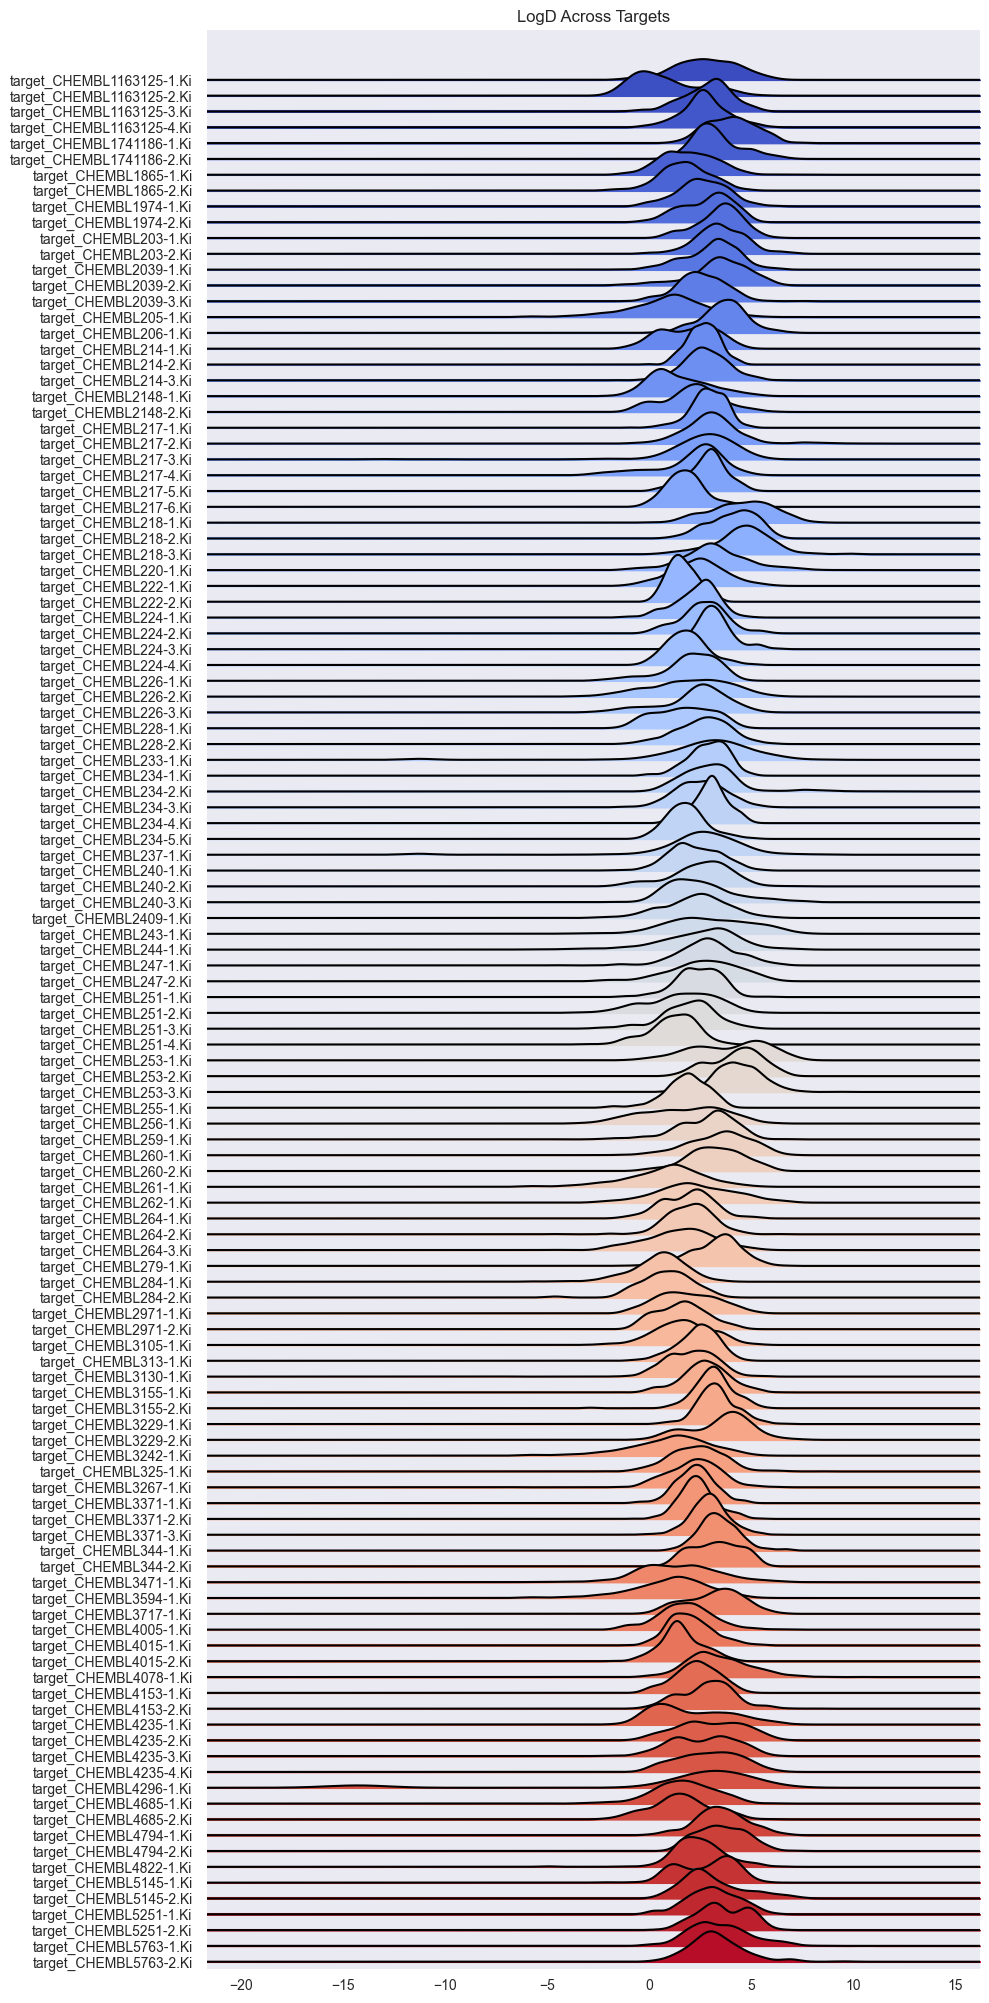

In [25]:
create_joyplot("LogD", "coolwarm")

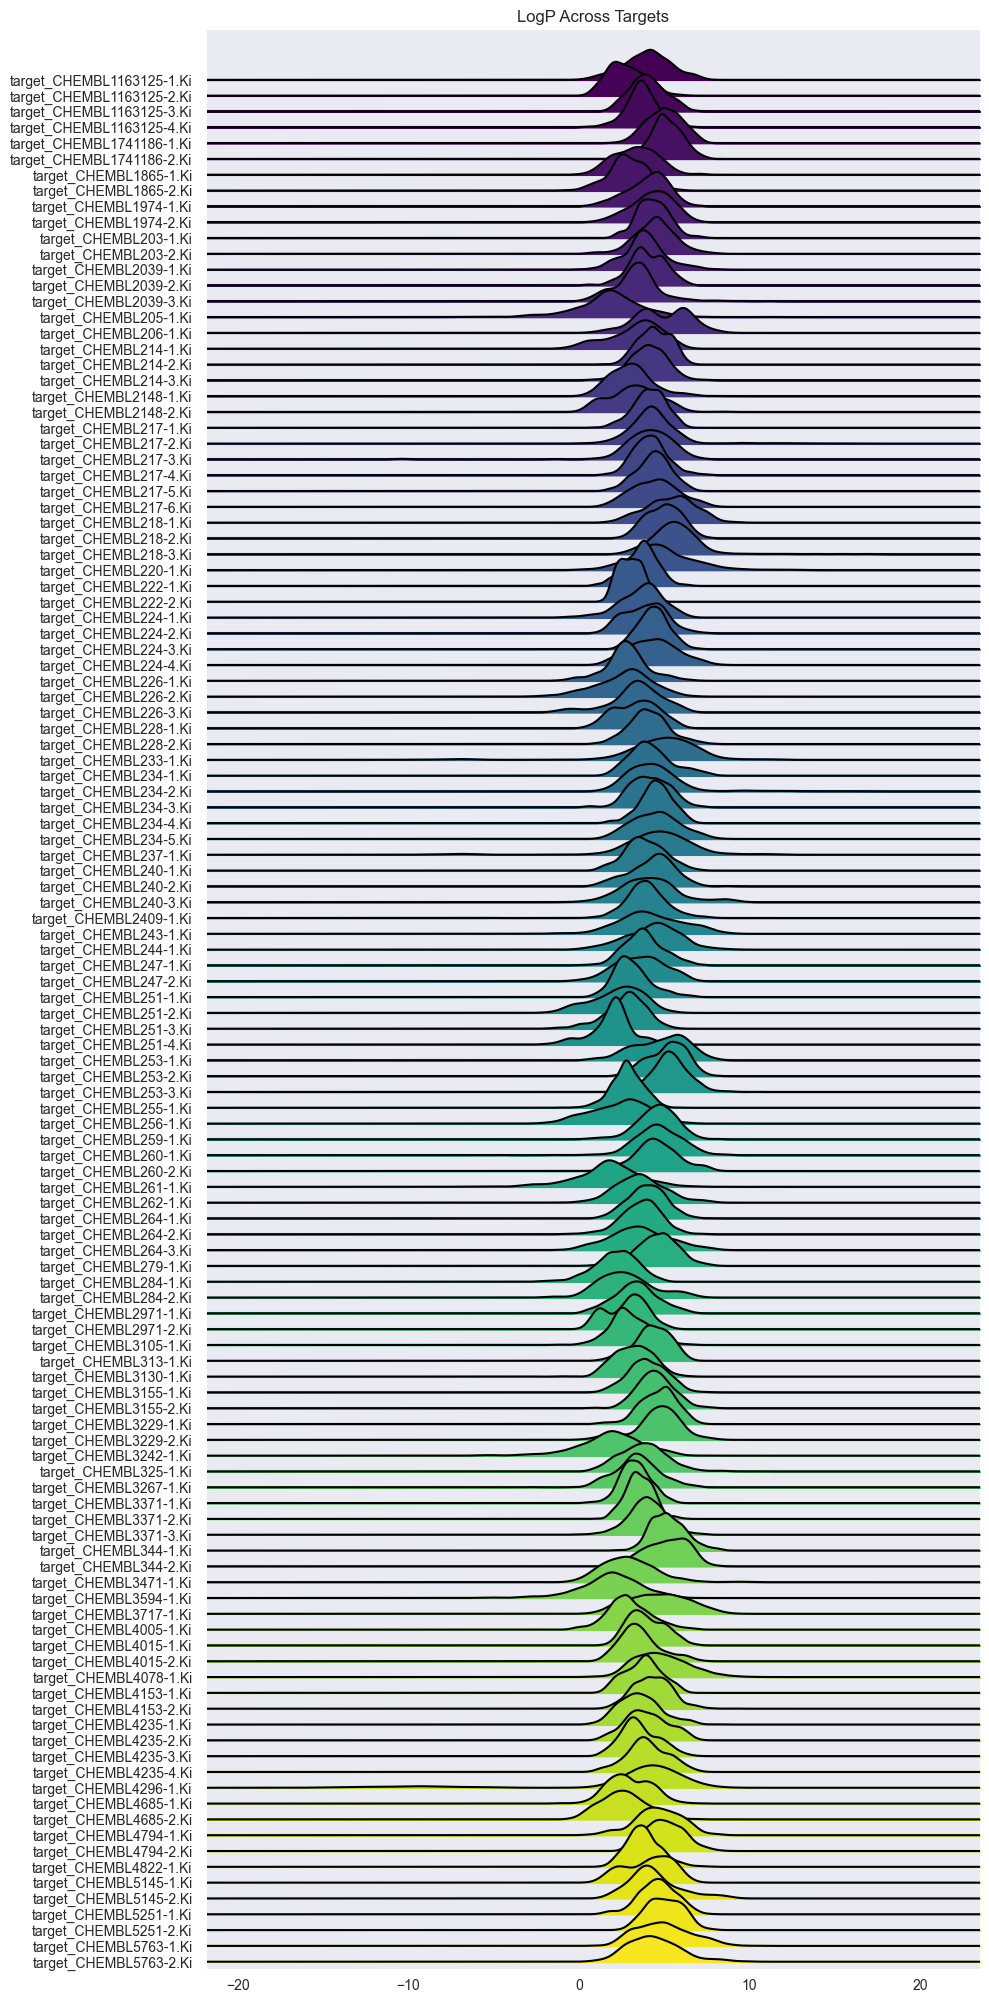

In [26]:
create_joyplot("LogP", "viridis")

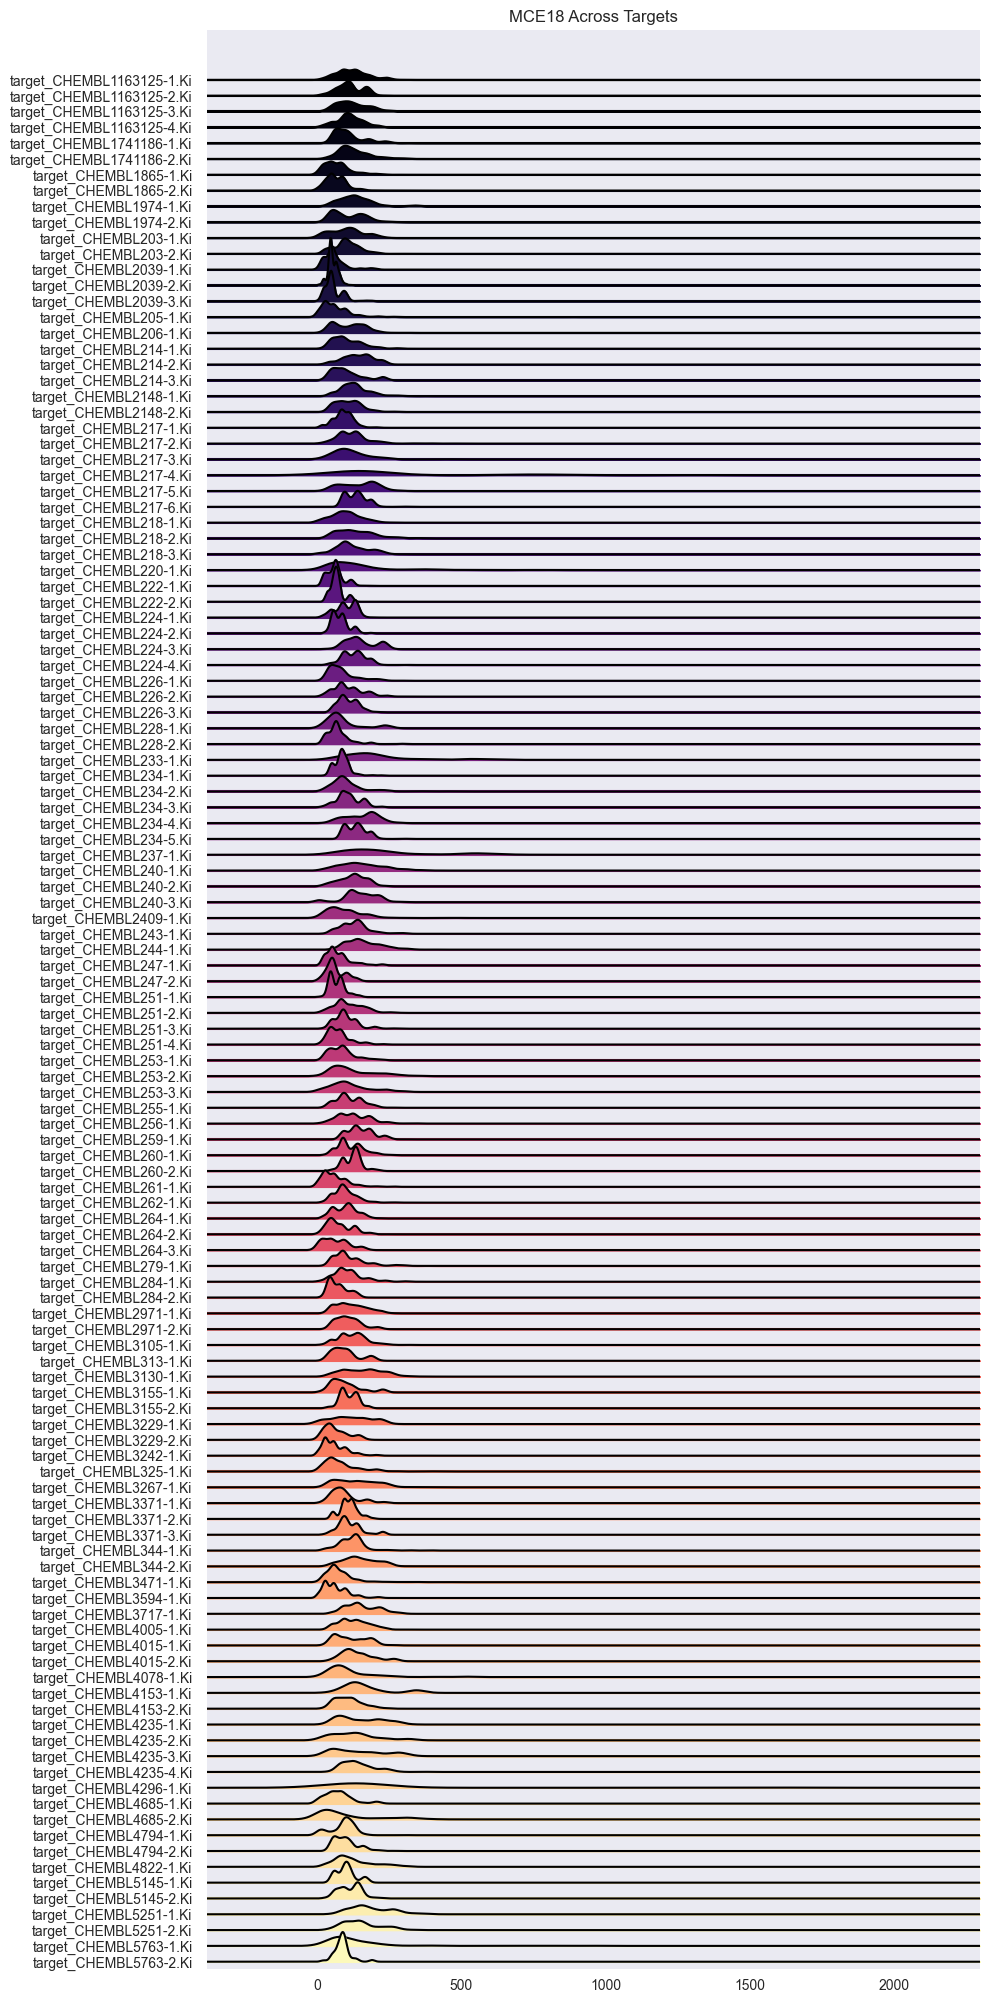

In [27]:
create_joyplot("MCE18", "magma")